In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take only the first two features for simplicity
y = (iris.target != 0).astype(int)  # Convert to binary classification problem

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Define the multi-layer perceptron (MLP) model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [5]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the MLP
model.fit(X_train, y_train, epochs=1000, verbose=0)

In [6]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

1/1 [==============================] - 0s 164ms/step - loss: 0.0076 - accuracy: 1.0000
Test Loss: 0.007604572456330061, Test Accuracy: 1.0


313/313 [==============================] - 1s 2ms/step


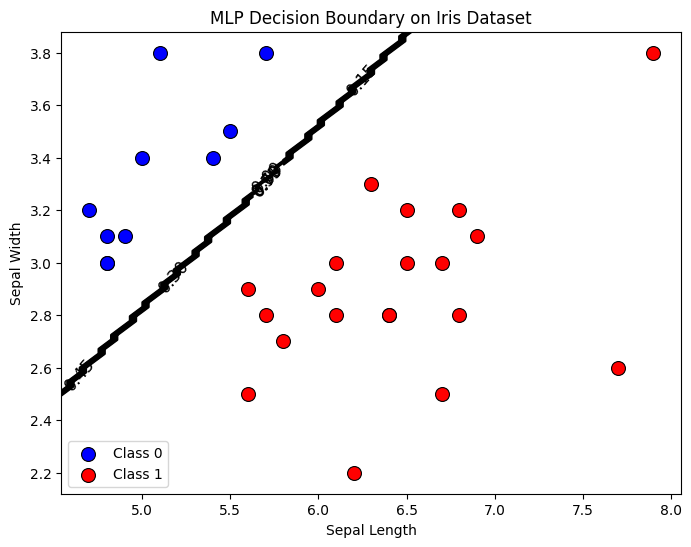

In [7]:
# Function to plot decision boundary
def plot_decision_boundary(model, X, y):
    plt.figure(figsize=(8, 6))

    # Plot the data points for class 0 (blue)
    sns.scatterplot(x=X[y == 0][:, 0], y=X[y == 0][:, 1], color='blue', s=100, edgecolor='k', label='Class 0')

    # Plot the data points for class 1 (red)
    sns.scatterplot(x=X[y == 1][:, 0], y=X[y == 1][:, 1], color='red', s=100, edgecolor='k', label='Class 1')

    # Plot the decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))

    # Concatenate grid points for prediction input
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Get predictions
    predictions = model.predict(grid)
    predicted_labels = (predictions > 0.5).astype(int)
    predicted_labels = predicted_labels.reshape(xx.shape)

    # Plot decision boundary
    contour = plt.contour(xx, yy, predicted_labels, colors='black', linewidths=2)
    plt.clabel(contour, inline=True, fontsize=12)

    plt.title('MLP Decision Boundary on Iris Dataset')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()
    plt.show()

# Visualize the decision boundary on the Iris dataset
plot_decision_boundary(model, X_test, y_test)